In [1]:
#  these code refered from keras document https://keras.io/examples/vision/mnist_convnet/

# import library
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
import tensorboard


#Question 1 


First I tested the effect of batch size. I use epoch = 5, default Adam optimizer. I tested the accuracy when batchsize is 1, 5, 10, 32, 64, 128,256 respectively. When batchsize = 1, the accuracy is 0.79. When batchsize = 5, the accuracy is 0.83. When batchsize = 5, the accuracy is 0.98. The accuracy is 0.99 when batchsize is 32,64,128. 

Then I tested the effect of learning rate. I used epoch = 5, batch size is 128, default Adam optimizer.  I tested the accuracy when learning rate is 0.01, 0.005, 0.001, 0.0005, 0.0001 respectively. When learning rate is 0.01,  test accuracy is 0.10. When learning rate is 0.005,  test accuracy is 0.11. When learning rate is 0.001,  test accuracy is  0.984. When learning rate is 0.0005 and 0.0001,  test accuracy is 0.99. 

Then I tested the effect of the optimizer. I used epoch = 5, batch size is 128,the default Adam, SGD, and RMSprop optimizer. All three optimizers have the test accuracy of 0.99. 

The final accuracy of the regular CNN is 0.99, inverted CNN, and hour-glass shaped CNN are all 0.987. Regular CNN is slightly better than the other two.

In [2]:
# Load the MNIST dataset

# number of classes
n_class = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(image_train, class_train),(image_test, class_test) = keras.datasets.mnist.load_data()


# Scale images to the [0, 1] range
image_train = image_train.astype("float32") / 255
image_test = image_test.astype("float32") / 255

#add an additional dimension to represent the single-channel
x_train = image_train.reshape(-1, 28, 28, 1) 
x_test = image_test.reshape(-1, 28, 28, 1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(class_train, n_class)
y_test = keras.utils.to_categorical(class_test, n_class)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


1.1. A regular CNN where the number of filters in each layer increases as the depth of the network grows.

In [9]:
# Build a 10-layer regular CNN model

regular_cnn = keras.Sequential()
#regular_cnn = keras.models.Sequential()
regular_cnn.add(keras.layers.Conv2D(6, kernel_size=(3, 3),padding='same', activation="relu"))
regular_cnn.add(keras.layers.Conv2D(10, kernel_size=(3, 3), padding='same',activation="relu"))
regular_cnn.add(keras.layers.Conv2D(16, kernel_size=(3, 3),padding='same', activation="relu"))
regular_cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

regular_cnn.add(keras.layers.Conv2D(24, kernel_size=(3, 3),padding='same', activation="relu"))
regular_cnn.add(keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same',activation="relu"))
regular_cnn.add(keras.layers.Conv2D(48, kernel_size=(3, 3),padding='same', activation="relu"))
regular_cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

regular_cnn.add(keras.layers.Conv2D(64, kernel_size=(3, 3),padding='same', activation="relu"))
regular_cnn.add(keras.layers.Conv2D(96, kernel_size=(3, 3), padding='same',activation="relu"))
regular_cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

regular_cnn.add(keras.layers.Conv2D(128, kernel_size=(3, 3),padding='same', activation="relu"))
regular_cnn.add(keras.layers.Conv2D(256, kernel_size=(3, 3),padding='same', activation="relu"))
regular_cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

#flatten 2d data to 1d
regular_cnn.add(keras.layers.Flatten())
regular_cnn.add(keras.layers.Dense(256))
regular_cnn.add(keras.layers.Activation('relu'))
#regular_cnn.add(keras.layers.Dense(256))
#regular_cnn.add(keras.layers.Activation('relu'))
# output layer
regular_cnn.add(keras.layers.Dense(n_class))
regular_cnn.add(keras.layers.Activation('softmax'))

regular_cnn.build(input_shape=(1,28,28,1))
# print summary of the model
regular_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (1, 28, 28, 6)            60        
                                                                 
 conv2d_31 (Conv2D)          (1, 28, 28, 10)           550       
                                                                 
 conv2d_32 (Conv2D)          (1, 28, 28, 16)           1456      
                                                                 
 max_pooling2d_12 (MaxPoolin  (1, 14, 14, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (1, 14, 14, 24)           3480      
                                                                 
 conv2d_34 (Conv2D)          (1, 14, 14, 32)           6944      
                                                      

In [4]:
# test the effect of batch size to test accuracy

batch_size = 10
epochs = 5

# compile the model
regular_cnn.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])
# train the model
regular_cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate
score = regular_cnn.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
5400/5400 [==============================] - 42s 6ms/step - loss: 0.1995 - accuracy: 0.9380 - val_loss: 0.0689 - val_accuracy: 0.9805
Epoch 2/5
5400/5400 [==============================] - 33s 6ms/step - loss: 0.0761 - accuracy: 0.9789 - val_loss: 0.0442 - val_accuracy: 0.9882
Epoch 3/5
5400/5400 [==============================] - 32s 6ms/step - loss: 0.0629 - accuracy: 0.9827 - val_loss: 0.0392 - val_accuracy: 0.9897
Epoch 4/5
5400/5400 [==============================] - 32s 6ms/step - loss: 0.0560 - accuracy: 0.9854 - val_loss: 0.0437 - val_accuracy: 0.9895
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 0.0347 - accuracy: 0.9903
Test loss: 0.03468652814626694
Test accuracy: 0.9902999997138977


In [8]:
# # test the effect of learning rate to test accuracy

batch_size = 128
epochs = 5
opt1 = keras.optimizers.Adam(learning_rate=0.005)
# compile the model
regular_cnn.compile(loss="categorical_crossentropy", optimizer=opt1, metrics=["accuracy"])
# train the model
regular_cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate
score = regular_cnn.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
422/422 [==============================] - 5s 10ms/step - loss: 0.5600 - accuracy: 0.8022 - val_loss: 0.0985 - val_accuracy: 0.9707
Epoch 2/5
422/422 [==============================] - 4s 10ms/step - loss: 0.1055 - accuracy: 0.9683 - val_loss: 0.0647 - val_accuracy: 0.9803
Epoch 3/5
422/422 [==============================] - 4s 10ms/step - loss: 0.0795 - accuracy: 0.9765 - val_loss: 0.0543 - val_accuracy: 0.9855
Epoch 4/5
422/422 [==============================] - 4s 10ms/step - loss: 0.0686 - accuracy: 0.9802 - val_loss: 0.0556 - val_accuracy: 0.9850
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0452 - accuracy: 0.9863
Test loss: 0.04517043009400368
Test accuracy: 0.986299991607666


In [10]:

# # test the effect of optimizer to test accuracy

# opt1 = keras.optimizers.Adam(learning_rate=0.001)
# opt2 = keras.optimizers.SGD(learning_rate=0.001)
# opt3 = keras.optimizers.RMSprop( learning_rate=0.001,   rho=0.9,   momentum=0.0)

epochs = 5
batch_size = 128


# compile the model
regular_cnn.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])
# train the model
regular_cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate
score = regular_cnn.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
422/422 [==============================] - 6s 11ms/step - loss: 0.2797 - accuracy: 0.9092 - val_loss: 0.0558 - val_accuracy: 0.9832
Epoch 2/5
422/422 [==============================] - 4s 10ms/step - loss: 0.0579 - accuracy: 0.9814 - val_loss: 0.0393 - val_accuracy: 0.9878
Epoch 3/5
422/422 [==============================] - 5s 13ms/step - loss: 0.0405 - accuracy: 0.9877 - val_loss: 0.0321 - val_accuracy: 0.9912
Epoch 4/5
422/422 [==============================] - 4s 11ms/step - loss: 0.0308 - accuracy: 0.9904 - val_loss: 0.0334 - val_accuracy: 0.9907
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0261 - accuracy: 0.9919
Test loss: 0.026087500154972076
Test accuracy: 0.9919000267982483


1.2. An inverted CNN where the number of filters in each layer decreases as the depth of the network grows 

In [11]:
# Build a 10-layer regular CNN model

regular_cnn2 = keras.Sequential()
#regular_cnn = keras.models.Sequential()
regular_cnn2.add(keras.layers.Conv2D(256, kernel_size=(3, 3),padding='same', activation="relu"))
regular_cnn2.add(keras.layers.Conv2D(128, kernel_size=(3, 3), padding='same',activation="relu"))
regular_cnn2.add(keras.layers.Conv2D(96, kernel_size=(3, 3),padding='same', activation="relu"))
regular_cnn2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

regular_cnn2.add(keras.layers.Conv2D(64, kernel_size=(3, 3),padding='same', activation="relu"))
regular_cnn2.add(keras.layers.Conv2D(48, kernel_size=(3, 3), padding='same',activation="relu"))
regular_cnn2.add(keras.layers.Conv2D(32, kernel_size=(3, 3),padding='same', activation="relu"))
regular_cnn2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

regular_cnn2.add(keras.layers.Conv2D(24, kernel_size=(3, 3),padding='same', activation="relu"))
regular_cnn2.add(keras.layers.Conv2D(16, kernel_size=(3, 3), padding='same',activation="relu"))
regular_cnn2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
regular_cnn2.add(keras.layers.Conv2D(10, kernel_size=(3, 3),padding='same', activation="relu"))
regular_cnn2.add(keras.layers.Conv2D(6, kernel_size=(3, 3),padding='same', activation="relu"))
#regular_cnn.add(keras.layers.Conv2D(768, kernel_size=(3, 3), padding='same',activation="relu"))
#regular_cnn.add(keras.layers.Conv2D(1024, kernel_size=(3, 3),padding='same', activation="relu"))
regular_cnn2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

#flatten 2d data to 1d
regular_cnn2.add(keras.layers.Flatten())
regular_cnn2.add(keras.layers.Dense(1024))
regular_cnn2.add(keras.layers.Activation('relu'))
#regular_cnn.add(keras.layers.Dense(256))
#regular_cnn.add(keras.layers.Activation('relu'))
# output layer
regular_cnn2.add(keras.layers.Dense(n_class))
regular_cnn2.add(keras.layers.Activation('softmax'))

regular_cnn2.build(input_shape=(1,28,28,1))
# print summary of the model
regular_cnn2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (1, 28, 28, 256)          2560      
                                                                 
 conv2d_41 (Conv2D)          (1, 28, 28, 128)          295040    
                                                                 
 conv2d_42 (Conv2D)          (1, 28, 28, 96)           110688    
                                                                 
 max_pooling2d_16 (MaxPoolin  (1, 14, 14, 96)          0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (1, 14, 14, 64)           55360     
                                                                 
 conv2d_44 (Conv2D)          (1, 14, 14, 48)           27696     
                                                      

In [12]:

epochs = 5
batch_size = 128


# compile the model
regular_cnn2.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])
# train the model
regular_cnn2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate
score = regular_cnn2.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
422/422 [==============================] - 24s 52ms/step - loss: 0.3497 - accuracy: 0.8839 - val_loss: 0.0816 - val_accuracy: 0.9748
Epoch 2/5
422/422 [==============================] - 21s 49ms/step - loss: 0.0858 - accuracy: 0.9747 - val_loss: 0.0744 - val_accuracy: 0.9792
Epoch 3/5
422/422 [==============================] - 20s 48ms/step - loss: 0.0630 - accuracy: 0.9815 - val_loss: 0.0445 - val_accuracy: 0.9875
Epoch 4/5
422/422 [==============================] - 20s 48ms/step - loss: 0.0502 - accuracy: 0.9851 - val_loss: 0.0414 - val_accuracy: 0.9875
Epoch 5/5
313/313 [==============================] - 3s 7ms/step - loss: 0.0389 - accuracy: 0.9879
Test loss: 0.03893260285258293
Test accuracy: 0.9879000186920166


1.3. An hour-glass shaped CNN where the number of filters will increase till the Lth layer and reduce afterwards

In [13]:
# Build a 10-layer regular CNN model

regular_cnn3 = keras.Sequential()
#regular_cnn = keras.models.Sequential()
regular_cnn3.add(keras.layers.Conv2D(6, kernel_size=(3, 3),padding='same', activation="relu"))
regular_cnn3.add(keras.layers.Conv2D(16, kernel_size=(3, 3), padding='same',activation="relu"))
regular_cnn3.add(keras.layers.Conv2D(32, kernel_size=(3, 3),padding='same', activation="relu"))
regular_cnn3.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

regular_cnn3.add(keras.layers.Conv2D(64, kernel_size=(3, 3),padding='same', activation="relu"))
regular_cnn3.add(keras.layers.Conv2D(96, kernel_size=(3, 3), padding='same',activation="relu"))
regular_cnn3.add(keras.layers.Conv2D(128, kernel_size=(3, 3),padding='same', activation="relu"))
regular_cnn3.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

regular_cnn3.add(keras.layers.Conv2D(96, kernel_size=(3, 3),padding='same', activation="relu"))
regular_cnn3.add(keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same',activation="relu"))
regular_cnn3.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
regular_cnn3.add(keras.layers.Conv2D(32, kernel_size=(3, 3),padding='same', activation="relu"))
regular_cnn3.add(keras.layers.Conv2D(16, kernel_size=(3, 3),padding='same', activation="relu"))
#regular_cnn.add(keras.layers.Conv2D(768, kernel_size=(3, 3), padding='same',activation="relu"))
#regular_cnn.add(keras.layers.Conv2D(1024, kernel_size=(3, 3),padding='same', activation="relu"))
regular_cnn3.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

#flatten 2d data to 1d
regular_cnn3.add(keras.layers.Flatten())
regular_cnn3.add(keras.layers.Dense(1024))
regular_cnn3.add(keras.layers.Activation('relu'))
#regular_cnn.add(keras.layers.Dense(256))
#regular_cnn.add(keras.layers.Activation('relu'))
# output layer
regular_cnn3.add(keras.layers.Dense(n_class))
regular_cnn3.add(keras.layers.Activation('softmax'))

regular_cnn3.build(input_shape=(1,28,28,1))
# print summary of the model
regular_cnn3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (1, 28, 28, 6)            60        
                                                                 
 conv2d_51 (Conv2D)          (1, 28, 28, 16)           880       
                                                                 
 conv2d_52 (Conv2D)          (1, 28, 28, 32)           4640      
                                                                 
 max_pooling2d_20 (MaxPoolin  (1, 14, 14, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (1, 14, 14, 64)           18496     
                                                                 
 conv2d_54 (Conv2D)          (1, 14, 14, 96)           55392     
                                                      

In [14]:

epochs = 5
batch_size = 128


# compile the model
regular_cnn3.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])
# train the model
regular_cnn3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate
score = regular_cnn3.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
422/422 [==============================] - 9s 17ms/step - loss: 0.4029 - accuracy: 0.8636 - val_loss: 0.1007 - val_accuracy: 0.9683
Epoch 2/5
422/422 [==============================] - 7s 16ms/step - loss: 0.1011 - accuracy: 0.9685 - val_loss: 0.0527 - val_accuracy: 0.9852
Epoch 3/5
422/422 [==============================] - 7s 16ms/step - loss: 0.0642 - accuracy: 0.9801 - val_loss: 0.0505 - val_accuracy: 0.9855
Epoch 4/5
422/422 [==============================] - 7s 16ms/step - loss: 0.0483 - accuracy: 0.9854 - val_loss: 0.0478 - val_accuracy: 0.9858
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 0.0444 - accuracy: 0.9875
Test loss: 0.04437745735049248
Test accuracy: 0.987500011920929


# Question 2


1. What is the effect of learning rate on the training process? Which performed best?
I tried 11 different learning rate to study its effect to the training process. when learning rate is 0.00075 and 0.001 have the best performance. When learning rate get bigger, the performance becomes worse. when learning rate greater than 0.01, the best accuracy is 0.1. The learning rate and test accuracy are [0.0005, 0.00075, 0.001, 0.002, 0.003, 0.004, 0.005, 0.0075, 0.01, 0.025, 0.05] and [0.914900004863739, 0.9542199969291687, 0.9473400115966797, 0.936680018901825, 0.929099977016449, 0.9061999917030334, 0.8217999935150146, 0.10000000149011612, 0.6461399793624878, 0.10000000149011612, 0.10000000149011612] respectively.
2. I tried 8 different batch size to study its effect to the training process. when learning rate is 120 have the best performance. The batch size and test accuracy are [20, 40, 60, 80,100,120,150,200] and [0.9039199948310852, 0.9319599866867065, 0.9172000288963318, 0.9109600186347961, 0.9246199727058411, 0.9423999786376953, 0.9279400110244751, 0.9297000169754028] respectively.
3. I tried different hyperparamters and figure out the best performance happens when learning rate = 0.001 and batchsize is 128. The test accuracy is 0.95.
4. a. The performance of FF model is much worse than CNN model. the test accuracy is 0.288. 
b. FF has 31,604 parameters, the Lenet has 697046 parameters. LeNet has more parameters than FF model, but its worth it. The performance of LeNet is much better than FF model.


### Read training and testing data

In [15]:
# number of classes
n_class = 10
input_shape = (32, 32, 3)

# Load the data and split it between train and test sets
(image_train, class_train),(image_test, class_test) = keras.datasets.cifar10.load_data()


# Scale images to the [0, 1] range
image_train = image_train.astype("float32") / 255
image_test = image_test.astype("float32") / 255

#add an additional dimension to represent the single-channel
image_train = image_train.reshape(-1, 32, 32, 3) 
image_test = image_test.reshape(-1, 32, 32, 3)

print("image_train shape:", image_train.shape)
print(image_train.shape[0], "train samples")
print(image_train.shape[0], "test samples")

# convert class vectors to binary class matrices
class_train = keras.utils.to_categorical(class_train, n_class)
class_test = keras.utils.to_categorical(class_test, n_class)

170498071/170498071 [==============================] - 14s 0us/step
image_train shape: (50000, 32, 32, 3)
50000 train samples
50000 test samples


### The effect of learning rate

In [ ]:
lr_list = [0.0005, 0.00075, 0.001, 0.002, 0.003, 0.004, 0.005, 0.0075, 0.01, 0.025, 0.05]
Accuracy = []
for lr in lr_list:
  # Build a LeNet Convolutional Neural Network

  cnn_model = keras.Sequential()
  #layer 1-2
  cnn_model.add(keras.layers.Conv2D(6, kernel_size=(5, 5),padding='same', activation="relu"))
  cnn_model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  #layer 3-4
  cnn_model.add(keras.layers.Conv2D(16, kernel_size=(5, 5), padding='same',activation="relu"))
  cnn_model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  #layer 5
  cnn_model.add(keras.layers.Conv2D(120, kernel_size=(5, 5), padding='same',activation="relu"))

  #flatten 2d data to 1d
  cnn_model.add(keras.layers.Flatten())
  #layer 6
  cnn_model.add(keras.layers.Dense(84))
  cnn_model.add(keras.layers.Activation('relu'))

  # layer 7 output layer
  cnn_model.add(keras.layers.Dense(n_class))
  cnn_model.add(keras.layers.Activation('softmax'))

  cnn_model.build(input_shape=(1,32,32,3))
  # print summary of the model
  cnn_model.summary()

  # train the model
  epochs = 25
  batch_size = 128

  #define the optimizer
  opt = keras.optimizers.Adam(learning_rate=lr)

  # compile the model
  cnn_model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
  # train the model
  cnn_model.fit(image_train, class_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

  # Evaluate
  score = cnn_model.evaluate(image_train, class_train)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  Accuracy.append(score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (1, 32, 32, 6)            456       
                                                                 
 max_pooling2d (MaxPooling2D  (1, 16, 16, 6)           0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (1, 16, 16, 16)           2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (1, 8, 8, 16)            0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (1, 8, 8, 120)            48120     
                                                                 
 flatten (Flatten)           (1, 7680)                 0

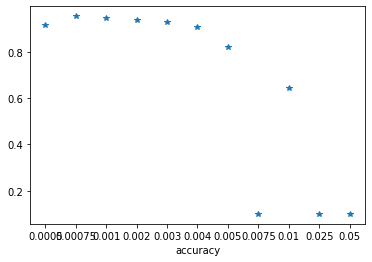

In [ ]:
#plot the accuracy of different learning rate
a = range(len(lr_list))

fig, ax = plt.subplots()
ax.plot(a, Accuracy, "*")
#plt.scatter(a, Accuracy)

ax.set_xticks(a)
ax.set_xticklabels(lr_list)

plt.xlabel('learning rate')
plt.xlabel('accuracy')

plt.show()


### The effect of batch size

In [ ]:
batchsize_list = [20, 40, 60, 80,100,120,150,200]

lr = 0.002
Accuracy2 = []
for batch_size in batchsize_list:
  # Build a LeNet Convolutional Neural Network

  cnn_model = keras.Sequential()
  #layer 1-2
  cnn_model.add(keras.layers.Conv2D(6, kernel_size=(5, 5),padding='same', activation="relu"))
  cnn_model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  #layer 3-4
  cnn_model.add(keras.layers.Conv2D(16, kernel_size=(5, 5), padding='same',activation="relu"))
  cnn_model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  #layer 5
  cnn_model.add(keras.layers.Conv2D(120, kernel_size=(5, 5), padding='same',activation="relu"))

  #flatten 2d data to 1d
  cnn_model.add(keras.layers.Flatten())
  #layer 6
  cnn_model.add(keras.layers.Dense(84))
  cnn_model.add(keras.layers.Activation('relu'))

  # layer 7 output layer
  cnn_model.add(keras.layers.Dense(n_class))
  cnn_model.add(keras.layers.Activation('softmax'))

  cnn_model.build(input_shape=(1,32,32,3))
  # print summary of the model
  cnn_model.summary()

  # train the model
  epochs = 25
  #batch_size = 128

  #define the optimizer
  opt = keras.optimizers.Adam(learning_rate=lr)

  # compile the model
  cnn_model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
  # train the model
  cnn_model.fit(image_train, class_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

  # Evaluate
  score = cnn_model.evaluate(image_train, class_train)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  Accuracy2.append(score[1])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (1, 32, 32, 6)            456       
                                                                 
 max_pooling2d_22 (MaxPoolin  (1, 16, 16, 6)           0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (1, 16, 16, 16)           2416      
                                                                 
 max_pooling2d_23 (MaxPoolin  (1, 8, 8, 16)            0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (1, 8, 8, 120)            48120     
                                                                 
 flatten_11 (Flatten)        (1, 7680)               

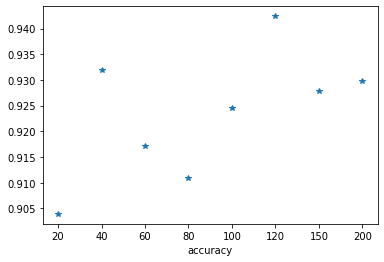

In [ ]:
#plot the accuracy of different batch size
a = range(len(batchsize_list))

fig, ax = plt.subplots()
ax.plot(a, Accuracy2, "*")
#plt.scatter(a, Accuracy)

ax.set_xticks(a)
ax.set_xticklabels(batchsize_list)

plt.xlabel('batch size')
plt.xlabel('accuracy')

plt.show()

In [ ]:
print(Accuracy2)

[0.9039199948310852, 0.9319599866867065, 0.9172000288963318, 0.9109600186347961, 0.9246199727058411, 0.9423999786376953, 0.9279400110244751, 0.9297000169754028]


### Best performance model

In [ ]:
# Build a LeNet Convolutional Neural Network

cnn_model = keras.Sequential()
#layer 1-2
cnn_model.add(keras.layers.Conv2D(6, kernel_size=(5, 5),padding='same', activation="relu"))
cnn_model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#layer 3-4
cnn_model.add(keras.layers.Conv2D(16, kernel_size=(5, 5), padding='same',activation="relu"))
cnn_model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#layer 5
cnn_model.add(keras.layers.Conv2D(120, kernel_size=(5, 5), padding='same',activation="relu"))

#flatten 2d data to 1d
cnn_model.add(keras.layers.Flatten())
#layer 6
cnn_model.add(keras.layers.Dense(84))
cnn_model.add(keras.layers.Activation('relu'))

# layer 7 output layer
cnn_model.add(keras.layers.Dense(n_class))
cnn_model.add(keras.layers.Activation('softmax'))

cnn_model.build(input_shape=(1,32,32,3))
# print summary of the model
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (1, 32, 32, 6)            456       
                                                                 
 max_pooling2d (MaxPooling2D  (1, 16, 16, 6)           0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (1, 16, 16, 16)           2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (1, 8, 8, 16)            0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (1, 8, 8, 120)            48120     
                                                                 
 flatten (Flatten)           (1, 7680)                 0

In [ ]:
# train the model
epochs = 25
batch_size = 128

#define the optimizer
opt = keras.optimizers.Adam(learning_rate=0.001)

# compile the model
cnn_model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
# train the model
cnn_model.fit(image_train, class_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate
score = cnn_model.evaluate(image_train, class_train)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
352/352 [==============================] - 11s 7ms/step - loss: 1.6300 - accuracy: 0.4130 - val_loss: 1.3891 - val_accuracy: 0.5070
Epoch 2/25
352/352 [==============================] - 2s 5ms/step - loss: 1.2887 - accuracy: 0.5414 - val_loss: 1.2062 - val_accuracy: 0.5614
Epoch 3/25
352/352 [==============================] - 2s 6ms/step - loss: 1.1260 - accuracy: 0.6015 - val_loss: 1.1009 - val_accuracy: 0.6152
Epoch 4/25
352/352 [==============================] - 2s 6ms/step - loss: 1.0073 - accuracy: 0.6445 - val_loss: 1.0156 - val_accuracy: 0.6422
Epoch 5/25
352/352 [==============================] - 2s 6ms/step - loss: 0.9048 - accuracy: 0.6799 - val_loss: 0.9538 - val_accuracy: 0.6706
Epoch 6/25
352/352 [==============================] - 2s 6ms/step - loss: 0.8257 - accuracy: 0.7123 - val_loss: 0.9465 - val_accuracy: 0.6716
Epoch 7/25
352/352 [==============================] - 2s 6ms/step - loss: 0.7452 - accuracy: 0.7406 - val_loss: 0.9309 - val_accuracy: 0.6854
Epoch

### Equivalent feedforwad network

In [ ]:
# Build a equivalent feed forward network of the LeNet Convolutional Neural Network

ff_model = keras.Sequential()

#flatten 2d data to 1d
ff_model.add(keras.layers.Flatten())

#layer 1-2
ff_model.add(keras.layers.Dense(6))
#ff_model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
ff_model.add(keras.layers.Activation('relu'))
#layer 3-4
ff_model.add(keras.layers.Dense(16))
#ff_model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
ff_model.add(keras.layers.Activation('relu'))
#layer 5
ff_model.add(keras.layers.Dense(120))
ff_model.add(keras.layers.Activation('relu'))


#layer 6
ff_model.add(keras.layers.Dense(84))
ff_model.add(keras.layers.Activation('relu'))

# layer 7 output layer
ff_model.add(keras.layers.Dense(n_class))
ff_model.add(keras.layers.Activation('softmax'))

ff_model.build(input_shape=(1,32,32,3))
# print summary of the model
ff_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (1, 3072)                 0         
                                                                 
 dense_38 (Dense)            (1, 6)                    18438     
                                                                 
 activation_38 (Activation)  (1, 6)                    0         
                                                                 
 dense_39 (Dense)            (1, 16)                   112       
                                                                 
 activation_39 (Activation)  (1, 16)                   0         
                                                                 
 dense_40 (Dense)            (1, 120)                  2040      
                                                                 
 activation_40 (Activation)  (1, 120)                

In [ ]:
# train the model
epochs = 25
batch_size = 128

#define the optimizer
opt = keras.optimizers.Adam(learning_rate=0.0005)

# compile the model
ff_model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
# train the model
ff_model.fit(image_train, class_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate
score = ff_model.evaluate(image_train, class_train)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1407/1407 [==============================] - 6s 4ms/step - loss: 2.0655 - accuracy: 0.2138 - val_loss: 2.0190 - val_accuracy: 0.2390
Epoch 2/25
1407/1407 [==============================] - 5s 4ms/step - loss: 1.9475 - accuracy: 0.2626 - val_loss: 1.9502 - val_accuracy: 0.2628
Epoch 3/25
1407/1407 [==============================] - 5s 4ms/step - loss: 1.9305 - accuracy: 0.2693 - val_loss: 1.9204 - val_accuracy: 0.2658
Epoch 4/25
1407/1407 [==============================] - 5s 3ms/step - loss: 1.9194 - accuracy: 0.2733 - val_loss: 1.9537 - val_accuracy: 0.2564
Epoch 5/25
1407/1407 [==============================] - 5s 4ms/step - loss: 1.9140 - accuracy: 0.2731 - val_loss: 1.9199 - val_accuracy: 0.2702
Epoch 6/25
1407/1407 [==============================] - 5s 3ms/step - loss: 1.9107 - accuracy: 0.2769 - val_loss: 1.9159 - val_accuracy: 0.2750
Epoch 7/25
1407/1407 [==============================] - 5s 3ms/step - loss: 1.9052 - accuracy: 0.2749 - val_loss: 1.9108 - val_accuracy:

# Question 3

1. The dimensions of the input is (6, 6, 1), the kernel's size is (3, 3, 1).  There are 10 parameters in the kernel f.

2. The output activation map when you apply the convolutional operation using the filter f on the input X without padding is: 

[[ 16.   9.  -4. -18.]
 [ 17.  -5. -10. -12.]
 [ 11.  -9. -17.   2.]
 [  9.  -1. -15.  16.]]

3. the output when you apply a max-pooling operation on the output from the activation map with a pooling filter size of 2 and stride of 2 is:

[[17. -4.]
 [11. 16.]]

A pooling filter size of 2 and stride of 1 is:

[[17.  9. -4.]
 [17. -5.  2.]
 [11. -1. 16.]]
 

In [21]:
# function to convlutional
# s is stride
def conv(input, filter, s = 1):

  H = input.shape[0]
  F = filter.shape[0]

  out_h = H-F+1
  acti_map = np.zeros((out_h,out_h))

  for j in range(out_h):

    for i in range(out_h):

      sub_input = input[j:j+F,i:i+F]

      acti_map[j, i] = np.sum(sub_input*filter)

  return acti_map

In [22]:
# function to pool
# s is stride, f is filter
def max_pooling(arr, f = 2, s = 2):

  h = arr.shape[0]

  out_h = (h-f)//s+1
  output = np.zeros((out_h,out_h))

  for j in range(out_h):
    starty = j*s
    for i in range(out_h):

      startx = i*s

      sub_input = arr[starty:starty+f,startx:startx+f]
      #print(sub_input)

      output[j, i] = np.max(sub_input)

  return output

In [23]:
# inout
arr_1d = np.array([7,5,0,0,3,2,
              6,4,5,1,4,8,
              9,0,2,2,5,4,
              6,3,4,7,9,8,
              5,7,5,6,9,0,
              7,9,0,8,2,3])
filt = np.array([1,0,-1,
             2, 0, -2,
             1, 0, -1])

arr_2d = arr_1d.reshape(6,6)
filt = filt.reshape(3, 3)

# call function to conv
activation_map = conv(arr_2d, filt)
# call function to pool
pool_map = max_pooling(activation_map, f = 2, s = 2)


In [24]:
print(activation_map)

[[ 16.   9.  -4. -18.]
 [ 17.  -5. -10. -12.]
 [ 11.  -9. -17.   2.]
 [  9.  -1. -15.  16.]]


In [25]:
print(pool_map)

[[17. -4.]
 [11. 16.]]


In [26]:
print(max_pooling(activation_map, f = 2, s = 1))

[[17.  9. -4.]
 [17. -5.  2.]
 [11. -1. 16.]]
